#  Iris Data Set 
https://en.wikipedia.org/wiki/Iris_flower_data_set

### Informazioni sul data set:

Questo data set contiene 150 record riguardanti la lunghezza, larghezza dei petali e sepali di 3 diversi tipi di iris (Setosa, Versicolour, and Virginica).

Le colonne sono definite da: Sepal Length (cm), Sepal Width (cm), Petal Length (cm) e Petal Width (cm).

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

iris = datasets.load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X)
df.columns = iris['feature_names']

le = LabelEncoder()
le.fit(iris.target_names)
df['type'] = le.inverse_transform(y)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Osserviamo prima i dati

#### Perchè è importante osservare prima i dati?
Osservare i dati potrebbe essere utile per diversi motivi, dobbiamo capire se serve o meno fare pre-processing su di essi. Il pre-processing consiste nella pre-elaborazione dei dati prima di passarli al nostro modello, nel nostro caso un multilayer perceptron.

- Potrebbe servirci a vedere se abbiamo degli outlier (ad esempio dati da un errore umano nel prendere i dati, se avessimo un petalo lungo 4 metri tra i nostri dati potremmo accorgerci che c'è qualcosa che non va). Questi outlier, che siano errori umani o no, potrebbero compromettere l'apprendimento della nostra rete neurale. In questi casi è cosa buona e giusta eliminare quei dati (se errati) e se possibile imputarli, o standardizzarli.


- Se tra le nostre feature abbiamo distrubuzioni troppo diverse (ad esempio una feature si distribuisce tra 0 e 1 mentre un'altra ha valori tra 0 e 10M, quest'ultima avrà un'influenza maggiore nell'apprendimento della nostra rete neurale, cosa che potremmo non desiderare. In questo caso potrebbe essere utile normalizzare i nostri dati.

### Box plot

Proviamo ad osservare i nostri dati con un box plot, in questo modo abbiamo una buona visualizzazione della loro distribuzione e siamo capaci di vedere se abbiamo outlier, che come abbiamo visto potrebbero risultare un po' fastidiosi per la nostra rete neurale. Per fortuna sembrano non esserci, e inoltre i dati si distribuiscono in un range abbastanza simile, in questo caso non abbiamo bisogno di normalizzare i dati. 

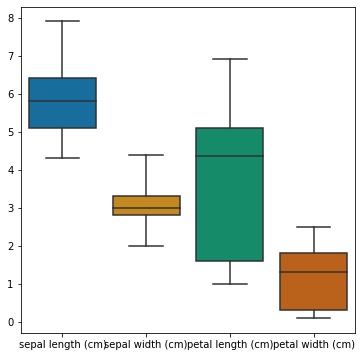

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.boxplot(data=df.iloc[:,:-1], palette='colorblind', orient='v', whis='range')
plt.show()

## Feature selection 
Un altro passo importante del pre-processing dei nostri dati è la feature selection. Consiste nel selezionare gli attributi che possono rendere più accurata la nostra rete neurale e scartare quelli irrilevanti che possono diminuirne l'accuratezza.

Esistono diversi modi per fare la feature selection, essendo questo un data set con solo 4 colonne c'è poco da selezionare, ma controlliamo la correlazione tra le feature per vedere che relazione hanno tra di loro. Controllare la correlazione potrebbe farci capire se: 

- Uno o più attributi dipendono da un'altro attributo.
- Uno o più attributi sono associati ad altri attributi.

#### Ma perchè ci torna utile? 
- La correlazione ci può aiutare a predire un attributo da un altro (ottimo modo per imputare valori mancanti o errati).
- La correlazione ci può *(a volte)* indicare la presenza di relazioni di causa.

https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

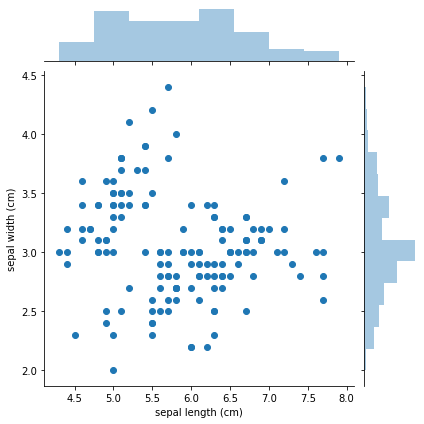

In [3]:
sns.jointplot("sepal length (cm)", "sepal width (cm)", data=df, kind="scatter")
plt.show()

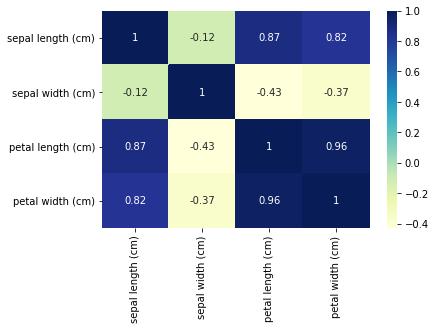

In [4]:
sns.heatmap(df[df.columns[:-1]].corr(), annot = True, cmap="YlGnBu")
plt.show()

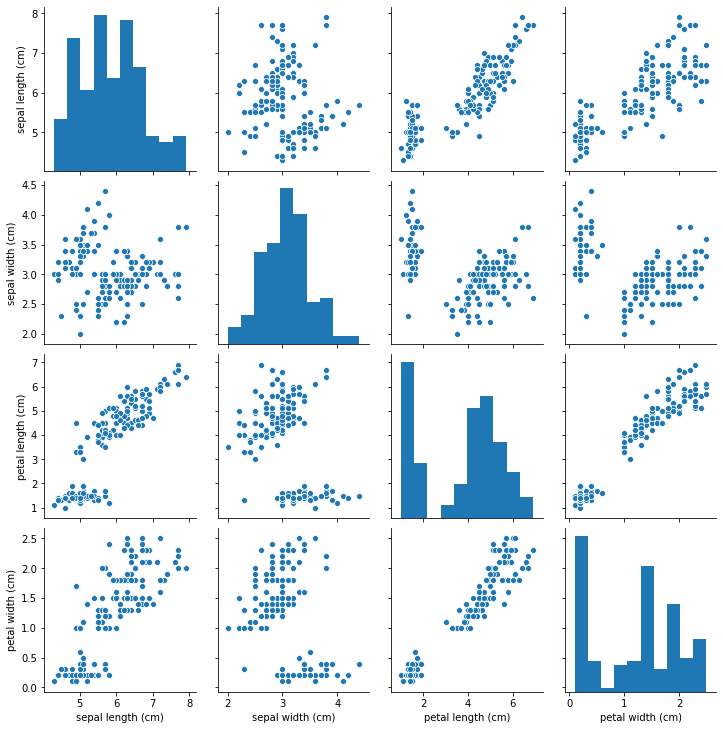

In [5]:
sns.pairplot(df, x_vars=df.columns[:-1], y_vars=df.columns[:-1])
plt.show()

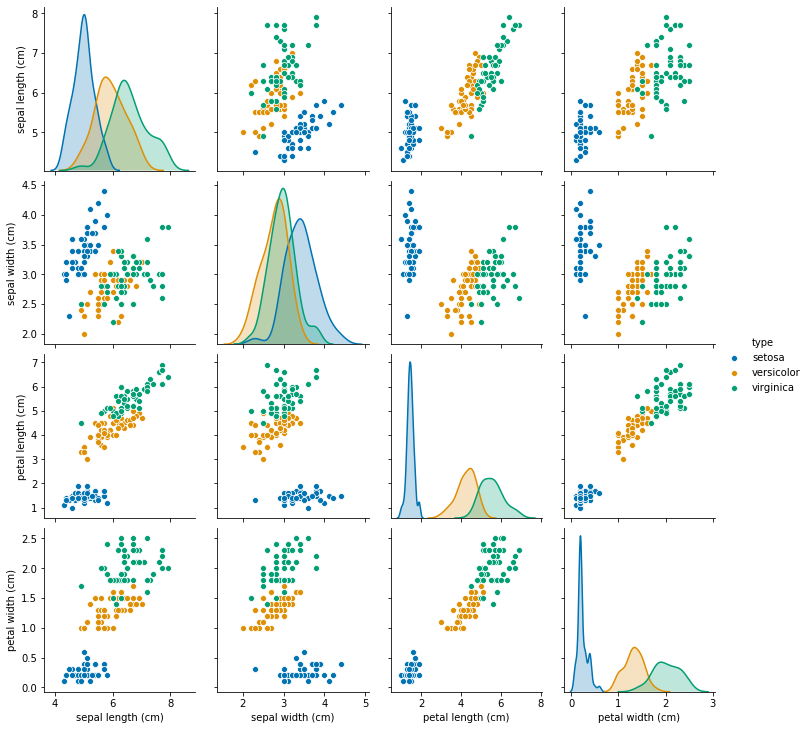

In [6]:
sns.pairplot(df, palette="colorblind", hue='type', x_vars=df.columns[:-1], y_vars=df.columns[:-1])
plt.show()

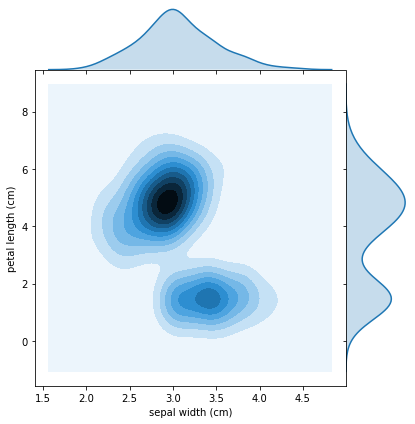

In [7]:
sns.jointplot("sepal width (cm)", "petal length (cm)", data=df, kind="kde", space=0)
plt.show()

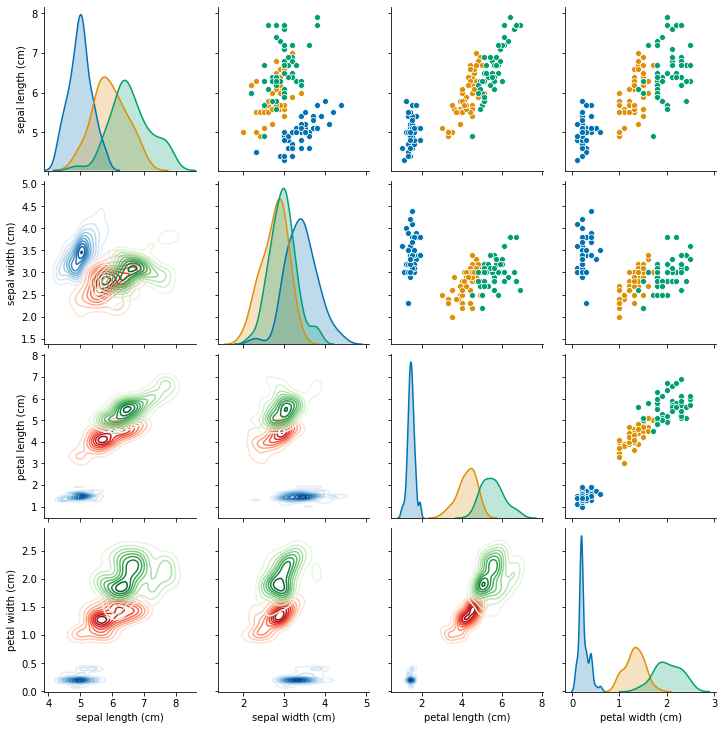

In [8]:
g = sns.PairGrid(df, hue="type", hue_kws={"cmap": ["Blues", "Reds", "Greens"]}, palette="colorblind", diag_sharey=False)

g = g.map_diag(sns.kdeplot, shade=True)
g = g.map_lower(sns.kdeplot, shade_lowest=False)
g = g.map_upper(sns.scatterplot)

In [9]:
import matplotlib.patheffects as PathEffects

def scatter(x, labels, names):
    palette = np.array(sns.color_palette("colorblind", 3))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    sc = ax.scatter(x[:,0], x[:,1], c=palette[list(labels)], alpha=0.7)
    
    ax.axis('off')

    txts = []
    for i in range(len(names)):
        # Ogni label viene posta nella mediana dei punti corrispondenti.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(names[i]), fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    return f, ax, sc, txts

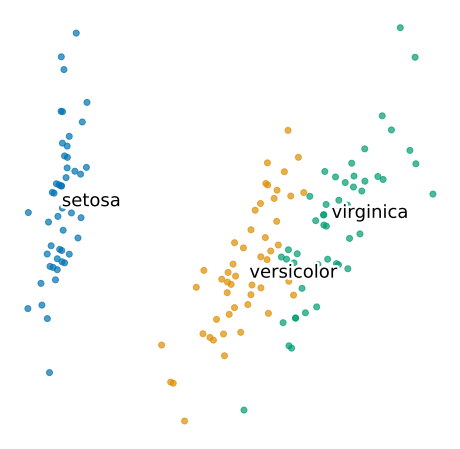

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig_pca, ax_pca, _, _ = scatter(X_pca, y.astype(int), iris.target_names)
plt.show()

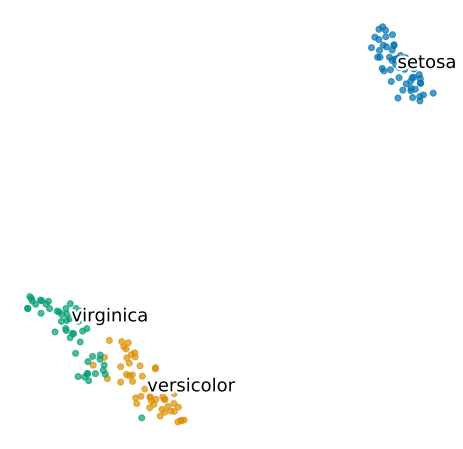

In [11]:
from sklearn.manifold import TSNE

X_tsne = TSNE().fit_transform(X)

fig_tsne, ax_tsne, _, _ = scatter(X_tsne, y.astype(int), iris.target_names)
plt.show()

In [13]:
bc = datasets.load_breast_cancer()

X_bc = bc['data']
y_bc = bc['target']

df_bc = pd.DataFrame(X)
df_bc.columns = bc['feature_names']

le = LabelEncoder()
le.fit(bc.target_names)
df_bc['type'] = le.inverse_transform(y_bc)

df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,benign


In [14]:
g = sns.PairGrid(df_bc, hue="type", hue_kws={"cmap": ["Blues", "Reds",]}, palette="colorblind", diag_sharey=False)

g = g.map_diag(sns.kdeplot, shade=True)
g = g.map_lower(sns.kdeplot, shade_lowest=False)
g = g.map_upper(sns.scatterplot)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000012AE60FF168> (for post_execute):


KeyboardInterrupt: 

In [ ]:
pca = PCA(n_components=2)
X_bc_pca = pca.fit_transform(X_bc)

fig_pca, ax_pca, _, _ = scatter(X_bc_pca, y_bc.astype(int), bc.target_names)
plt.show()

In [ ]:
X_bc_tsne = TSNE(perplexity=100).fit_transform(X_bc)

fig_tsne, ax_tsne, _, _ = scatter(X_bc_tsne, y_bc.astype(int), bc.target_names)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)

nn = MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(5), 
                   learning_rate_init=0.2, max_iter=10000, learning_rate='adaptive')

nn.fit(X_train, y_train)

nn.score(X_test, y_test)

In [ ]:
nn.predict(X_test)

In [ ]:
y_test

In [ ]:
nn = MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(5), 
                   learning_rate_init=0.2, max_iter=10000, learning_rate='adaptive')

hidden_layer_sizes = [(10,2), (10), (5,5)]
learning_rate_init = [0.2, 0.1, 0.01]

classifiers = []

for layers in hidden_layer_sizes:
    for lri in learning_rate_init: 
        classifiers.append(("HL: {} | LRI: {}".format(layers,lri), MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=layers, 
                                         learning_rate_init=lri, max_iter=500, learning_rate='adaptive')))

        
N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 51
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
my_nn_scores_train = []
my_nn_scores_test = []

num = 0
for name, clf in classifiers:
    epoch = 0
    clf_scores_train = []
    clf_scores_test = []
    for epoch in range(N_EPOCHS):
        nn.partial_fit(X_train, y_train, classes=N_CLASSES
                      )
        clf.partial_fit(X_train, y_train, classes=N_CLASSES)
        
        clf_scores_train.append(clf.score(X_train, y_train))

        clf_scores_test.append(clf.score(X_test, y_test))
        if num == 0:
            my_nn_scores_train.append(nn.score(X_train, y_train))
            my_nn_scores_test.append(nn.score(X_test, y_test))
        
    num+=1
    scores_train.append((name, clf_scores_train))
    scores_test.append((name, clf_scores_test))

    
for (name1, sc_train), (name2, sc_test) in zip(scores_train, scores_test):
    plt.plot(sc_train)
    plt.plot(sc_test)

plt.plot(my_nn_scores_test)
plt.plot(my_nn_scores_train)
    
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
palette = plt.get_cmap('tab10')
 
num=0
for (name, score_test) in scores_test:
    num+=1
 
    plt.subplot(3,3, num)

            
    plt.plot(score_test, marker='', color=palette(num+1), linewidth=2.4, alpha=0.9)
    
    
    plt.plot(my_nn_scores_test, color=palette(4), alpha=0.2)

 
    plt.xlim(0,N_EPOCHS-1)
    plt.ylim(0,1)
 
    if num in range(7) :
        plt.tick_params(labelbottom=False)
    if num not in [1,4,7] :
        plt.tick_params(labelleft=False)
        
    plt.title(name, loc='left', fontsize=12, fontweight=0, color=palette(num+1) )
    
plt.suptitle("Accuracy over epochs", fontsize=13, fontweight=0, color='black')
 
plt.text(-39, -0.3, 'Epochs')
plt.text(-130, 1.7, 'Accuracy', ha='center', va='center', rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
palette = plt.get_cmap('tab10')
 
my_nn_scores_test = np.array(my_nn_scores_test
                            )
num=0
for (name, score_test) in scores_test:
    num+=1
    
    score_test = np.array(score_test)
    
    plt.subplot(3,3, num)

            
    plt.plot(score_test-my_nn_scores_test, marker='', color=palette(num+1), linewidth=2.4, alpha=0.9)
    
    
    plt.plot(my_nn_scores_test - my_nn_scores_test, color=palette(4), alpha=0.2)

 
    plt.xlim(0,N_EPOCHS-1)
    plt.ylim(-1,1)
 
    if num in range(7) :
        plt.tick_params(labelbottom=False)
    if num not in [1,4,7] :
        plt.tick_params(labelleft=False)
        
    plt.title(name, loc='left', fontsize=12, fontweight=0, color=palette(num+1) )
    
plt.suptitle("Accuracy difference with reference over epochs", fontsize=13, fontweight=0, color='black')
 
plt.text(-39, -1.6, 'Epochs')
plt.text(-130, 2.5, 'Accuracy difference', ha='center', va='center', rotation='vertical')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#parametri che voglio testare tramite ricerca esaustiva con GridSearchCV 
params = {
    'hidden_layer_sizes': [(10,2), (10), (5,5)],
    'learning_rate_init' : [0.2, 0.1, 0.01,]
}

#MLP di partenza
mlp = MLPClassifier(activation='relu', solver='sgd', max_iter=10000, learning_rate='adaptive')

#testo i diversi parametri con 5-fold cross validation 
clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5, )
clf.fit(X, y)

print("Best estimator: ", clf.best_estimator_)

#testo come funziona il migliore stimatore trovato con 5-fold cross validation
scores = cross_val_score(clf, X, y, cv=5)
print("\nAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))